In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import pandas as pd
import os
from tabulate import tabulate 
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.metrics import categorical_accuracy
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.layers.convolutional  import ZeroPadding2D
from keras import Input
from keras.utils.data_utils import Sequence
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def unpickle(file):
  train = []
  files = os.listdir(path)
  for f in files:
    if f[0]=='d':
      p = file + str(f)
      with open(p, 'rb') as fo:
        d = pk.load(fo, encoding='bytes')
        train.append(d)
    
  XTrain = []
  YTrain = []
  for i in train:
    YTrain.append(np.array(i[b'labels']))
    XTrain.append(i[b'data'])

  XTrain = np.concatenate(XTrain,axis=0)  
  YTrain = np.concatenate(YTrain,axis=0)
  X =   XTrain.reshape(50000,32,32,3)
  Y = YTrain
  return  X,Y 

path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Dataset/cifar-10-batches-py/'
X,Y  = unpickle(path)


In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
# Data Preprocessing

cl = 10
X = X.astype('float32')
X = X/255.
Y = (np.arange(cl) == Y[:, None]).astype(np.float32)
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.3, random_state=3)

In [ ]:
print('XTrain Shape : ',XTrain.shape)
print('YTrain Shape : ',YTrain.shape)
print('XTest Shape : ',XTest.shape)
print('YTest Shape : ',YTest.shape)

XTrain Shape :  (35000, 32, 32, 3)
YTrain Shape :  (35000, 10)
XTest Shape :  (15000, 32, 32, 3)
YTest Shape :  (15000, 10)


In [ ]:
Shape = X.shape[1:]
Epochs = 50
Batch = 64

In [ ]:
def NetworkBuild1():
    
    model = Sequential()
    model.add(Input(shape=Shape))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(32, (3, 3),activation='relu', padding='same',kernel_initializer=keras.initializers.he_uniform(seed=None)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    sgd = SGD(momentum=0.9 ,lr=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
   
    return model

def NetworkBuild2():
    
    model = Sequential()
    model.add(Input(shape=Shape))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(32, (3, 3),activation='relu', padding='same',kernel_initializer=keras.initializers.he_uniform(seed=None)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    sgd = SGD(momentum=0.9 ,lr=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)

    return model

def NetworkBuild3():
    
    model = Sequential()
    model.add(Input(shape=Shape))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(32, (3, 3),activation='relu', padding='same',kernel_initializer=keras.initializers.he_uniform(seed=None)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    sgd = SGD(momentum=0.9 ,lr=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)

    return model

def NetworkBuild4():
    
    model = Sequential()
    model.add(Input(shape=Shape))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(32, (3, 3),activation='relu', padding='same',kernel_initializer=keras.initializers.he_uniform(seed=None)))
    model.add(Conv2D(64, (3, 3),activation='relu', padding='same',kernel_initializer=keras.initializers.he_uniform(seed=None)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    sgd = SGD(momentum=0.9 ,lr=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
   
    return model

def NetworkBuild5():
    
    model = Sequential()
    model.add(Input(shape=Shape))
    model.add(ZeroPadding2D(padding=(1, 1)))
    model.add(Conv2D(32, (3, 3),activation='relu', padding='same',kernel_initializer=keras.initializers.he_uniform(seed=None)))
    model.add(Conv2D(64, (3, 3),activation='relu', padding='same',kernel_initializer=keras.initializers.he_uniform(seed=None)))
    model.add(Conv2D(128, (3, 3),activation='relu', padding='same',kernel_initializer=keras.initializers.he_uniform(seed=None)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    sgd = SGD(momentum=0.9 ,lr=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=sgd)
   
    return model

model1 = NetworkBuild1()
model1.summary()

model2 = NetworkBuild2()
model2.summary()

model3 = NetworkBuild3()
model3.summary()

model4 = NetworkBuild4()
model4.summary()

model5 = NetworkBuild5()
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 34, 34, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 34, 34, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92490     
_________________________________________________________________
activation (Activation)      (None, 10)                0

In [ ]:
# h1 = model1.fit(XTrain, YTrain, epochs=Epochs, batch_size=Batch,
#                 validation_data= (XTest,YTest))



Epoch 1/50
547/547 [==============================] - 41s 75ms/step - loss: 0.9342 - accuracy: 0.7799 - val_loss: 1.4041 - val_accuracy: 0.6951
Epoch 2/50
547/547 [==============================] - 41s 74ms/step - loss: 0.7005 - accuracy: 0.8092 - val_loss: 1.3860 - val_accuracy: 0.6876
Epoch 3/50
547/547 [==============================] - 41s 74ms/step - loss: 0.5813 - accuracy: 0.8297 - val_loss: 1.3864 - val_accuracy: 0.6762
Epoch 4/50
547/547 [==============================] - 41s 74ms/step - loss: 0.5080 - accuracy: 0.8459 - val_loss: 1.4032 - val_accuracy: 0.6647
Epoch 5/50
547/547 [==============================] - 41s 74ms/step - loss: 0.4477 - accuracy: 0.8599 - val_loss: 1.3676 - val_accuracy: 0.6769
Epoch 6/50
547/547 [==============================] - 40s 74ms/step - loss: 0.4059 - accuracy: 0.8744 - val_loss: 1.2707 - val_accuracy: 0.6947
Epoch 7/50
547/547 [==============================] - 40s 74ms/step - loss: 0.3725 - accuracy: 0.8817 - val_loss: 1.3500 - val_accuracy:

In [ ]:
# h2 = model2.fit(XTrain, YTrain, epochs=Epochs, batch_size=Batch,
#                 validation_data= (XTest,YTest))

Epoch 1/50
547/547 [==============================] - 28s 51ms/step - loss: 1.8421 - accuracy: 0.3503 - val_loss: 1.6428 - val_accuracy: 0.4353
Epoch 2/50
547/547 [==============================] - 28s 51ms/step - loss: 1.5813 - accuracy: 0.4546 - val_loss: 1.5537 - val_accuracy: 0.4505
Epoch 3/50
547/547 [==============================] - 28s 51ms/step - loss: 1.4729 - accuracy: 0.4929 - val_loss: 1.4702 - val_accuracy: 0.4909
Epoch 4/50
547/547 [==============================] - 28s 51ms/step - loss: 1.4074 - accuracy: 0.5169 - val_loss: 1.3985 - val_accuracy: 0.5114
Epoch 5/50
547/547 [==============================] - 28s 51ms/step - loss: 1.3547 - accuracy: 0.5367 - val_loss: 1.3644 - val_accuracy: 0.5226
Epoch 6/50
547/547 [==============================] - 28s 51ms/step - loss: 1.3148 - accuracy: 0.5511 - val_loss: 1.3494 - val_accuracy: 0.5341
Epoch 7/50
547/547 [==============================] - 28s 51ms/step - loss: 1.2794 - accuracy: 0.5649 - val_loss: 1.3015 - val_accuracy:

In [ ]:
# h3 = model3.fit(XTrain, YTrain, epochs=Epochs, batch_size=Batch,
#              validation_data= (XTest,YTest))

Epoch 1/50
547/547 [==============================] - 44s 80ms/step - loss: 1.6458 - accuracy: 0.4146 - val_loss: 1.4187 - val_accuracy: 0.4930
Epoch 2/50
547/547 [==============================] - 44s 80ms/step - loss: 1.3102 - accuracy: 0.5403 - val_loss: 1.3120 - val_accuracy: 0.5319
Epoch 3/50
547/547 [==============================] - 44s 80ms/step - loss: 1.1754 - accuracy: 0.5888 - val_loss: 1.3340 - val_accuracy: 0.5273
Epoch 4/50
547/547 [==============================] - 44s 80ms/step - loss: 1.0823 - accuracy: 0.6209 - val_loss: 1.1965 - val_accuracy: 0.5773
Epoch 5/50
547/547 [==============================] - 44s 80ms/step - loss: 1.0098 - accuracy: 0.6453 - val_loss: 1.1807 - val_accuracy: 0.5949
Epoch 6/50
547/547 [==============================] - 44s 80ms/step - loss: 0.9402 - accuracy: 0.6705 - val_loss: 1.1976 - val_accuracy: 0.5899
Epoch 7/50
547/547 [==============================] - 44s 80ms/step - loss: 0.8831 - accuracy: 0.6931 - val_loss: 1.2000 - val_accuracy:

In [ ]:
# h3 = model3.fit(XTrain, YTrain, epochs=Epochs, batch_size=Batch,
#              validation_data= (XTest,YTest))

Epoch 1/50
547/547 [==============================] - 46s 84ms/step - loss: 0.8439 - accuracy: 0.7929 - val_loss: 1.1831 - val_accuracy: 0.7205
Epoch 2/50
547/547 [==============================] - 46s 83ms/step - loss: 0.4246 - accuracy: 0.8755 - val_loss: 1.0249 - val_accuracy: 0.7605
Epoch 3/50
547/547 [==============================] - 46s 83ms/step - loss: 0.2323 - accuracy: 0.9299 - val_loss: 0.9792 - val_accuracy: 0.7771
Epoch 4/50
547/547 [==============================] - 46s 84ms/step - loss: 0.1386 - accuracy: 0.9580 - val_loss: 0.9861 - val_accuracy: 0.7832
Epoch 5/50
547/547 [==============================] - 46s 83ms/step - loss: 0.0765 - accuracy: 0.9823 - val_loss: 1.0314 - val_accuracy: 0.7789
Epoch 6/50
547/547 [==============================] - 45s 83ms/step - loss: 0.0443 - accuracy: 0.9933 - val_loss: 1.0083 - val_accuracy: 0.7879
Epoch 7/50
547/547 [==============================] - 45s 83ms/step - loss: 0.0283 - accuracy: 0.9974 - val_loss: 0.9985 - val_accuracy:

In [ ]:
# h4 = model4.fit(XTrain, YTrain, epochs=Epochs, batch_size=Batch,
#               validation_data= (XTest,YTest))

Epoch 1/50
547/547 [==============================] - 205s 374ms/step - loss: 2.0496 - accuracy: 0.4065 - val_loss: 1.7402 - val_accuracy: 0.4588
Epoch 2/50
547/547 [==============================] - 201s 368ms/step - loss: 1.4917 - accuracy: 0.5260 - val_loss: 1.4571 - val_accuracy: 0.5177
Epoch 3/50
547/547 [==============================] - 202s 369ms/step - loss: 1.2576 - accuracy: 0.5840 - val_loss: 1.7640 - val_accuracy: 0.4766
Epoch 4/50
547/547 [==============================] - 205s 375ms/step - loss: 1.1159 - accuracy: 0.6277 - val_loss: 1.3786 - val_accuracy: 0.5471
Epoch 5/50
547/547 [==============================] - 201s 368ms/step - loss: 0.9846 - accuracy: 0.6692 - val_loss: 1.5834 - val_accuracy: 0.5222
Epoch 6/50
547/547 [==============================] - 201s 368ms/step - loss: 0.8824 - accuracy: 0.6986 - val_loss: 1.4069 - val_accuracy: 0.5552
Epoch 7/50
547/547 [==============================] - 204s 374ms/step - loss: 0.7669 - accuracy: 0.7361 - val_loss: 1.3896 -

In [ ]:
# h5 = model5.fit(XTrain, YTrain, epochs=Epochs, batch_size=Batch,
#               validation_data= (XTest,YTest))

Epoch 1/50
547/547 [==============================] - 616s 1s/step - loss: 2.6090 - accuracy: 0.3674 - val_loss: 2.0840 - val_accuracy: 0.3874
Epoch 2/50
547/547 [==============================] - 614s 1s/step - loss: 1.6687 - accuracy: 0.4962 - val_loss: 1.6355 - val_accuracy: 0.4861
Epoch 3/50
547/547 [==============================] - 617s 1s/step - loss: 1.3243 - accuracy: 0.5732 - val_loss: 1.6570 - val_accuracy: 0.4822
Epoch 4/50
547/547 [==============================] - 620s 1s/step - loss: 1.0803 - accuracy: 0.6359 - val_loss: 1.3090 - val_accuracy: 0.5675
Epoch 5/50
547/547 [==============================] - 622s 1s/step - loss: 0.9231 - accuracy: 0.6864 - val_loss: 1.4094 - val_accuracy: 0.5539
Epoch 6/50
547/547 [==============================] - 618s 1s/step - loss: 0.7885 - accuracy: 0.7295 - val_loss: 1.2988 - val_accuracy: 0.5795
Epoch 7/50
547/547 [==============================] - 616s 1s/step - loss: 0.6608 - accuracy: 0.7758 - val_loss: 1.3851 - val_accuracy: 0.5763

In [ ]:
path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Saved_Models'

# model1.save(path+'/model1.h5')
# np.save(path+'/h1.npy',h1.history)

# model2.save(path+'/model2.h5')
# np.save(path + '/h2.npy',h2.history)

# model3.save(path+'/model3.h5')
# np.save(path+'/h3.npy',h3.history)

# model4.save(path+'/model4.h5')
# np.save(path+'/h4.npy',h4.history)

# model5.save(path+'/model5.h5')
# np.save(path+'/h5.npy',h5.history)


path = '/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Saved_Models'

model1 = load_model(path + '/model1.h5')
h1=np.load(path+'/h1.npy',allow_pickle='TRUE')
h1 = h1.item()

model2 = load_model(path+'/model2.h5')
h2=np.load(path+'/h2.npy',allow_pickle='TRUE')
h2 = h2.item()

model3 = load_model(path+'/model3.h5')
h3=np.load(path+'/h3.npy',allow_pickle='TRUE')
h3 = h3.item()

model4 = load_model(path+'/model4.h5')
h4=np.load(path+'/h4.npy',allow_pickle='TRUE')
h4 = h4.item()

model5 = load_model(path+'/model5.h5')
h5=np.load(path+'/h5.npy',allow_pickle='TRUE')
h5 = h5.item()

In [ ]:
trainloss  = []
testloss  = []
trainacc = []
testacc = []
data = []

# model = [model1,model2,model3,model4,model5]
# for i in range(len(model)):
#     tr = model[i].evaluate(XTrain,YTrain)
#     tr[1] = round(tr[1]*100,3)
#     te = model[i].evaluate(XTest,YTest)
#     te[1] = round(te[1]*100,3)
#     data.append([i+1]+tr+te)

# Res  = pd.DataFrame(data,columns = ['Model','Training Loss','Training Accuracy',
#                                     'Testing Loss','Testing Accuracy'])

469/469 [==============================] - 62s 132ms/step - loss: 2.1705 - accuracy: 0.6076


In [ ]:
# Res.to_csv('/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Saved_Models/Result.csv')

print('\t\t\t\tModel Comparsion Table')
Res = pd.read_csv('/content/drive/MyDrive/Projects/ML_Assignment/ML_Assignment_6/Saved_Models/Result.csv')
print(tabulate(Res, tablefmt = 'psql',headers = 'keys'))


				Model Comparsion Table
+----+--------------+---------+-----------------+---------------------+----------------+--------------------+
|    |   Unnamed: 0 |   Model |   Training Loss |   Training Accuracy |   Testing Loss |   Testing Accuracy |
|----+--------------+---------+-----------------+---------------------+----------------+--------------------|
|  0 |            0 |       1 |      0.0317407  |              99.843 |        2.71804 |             61.207 |
|  1 |            1 |       2 |      0.781586   |              74.217 |        1.12876 |             61.407 |
|  2 |            2 |       3 |      0.00132682 |             100     |        1.22659 |             79.64  |
|  3 |            3 |       4 |      0.00560161 |             100     |        2.51731 |             58.48  |
|  4 |            4 |       5 |      0.00247113 |             100     |        2.1705  |             60.76  |
+----+--------------+---------+-----------------+---------------------+----------------+-----

In [ ]:
print('Best Model Number is :',int(Res.iloc[Res['Testing Accuracy'].idxmax()]['Model']))
hist = [h1,h2,h3,h4,h5]
opth = hist[Res['Testing Accuracy'].idxmax()]


Best Model Number is : 3


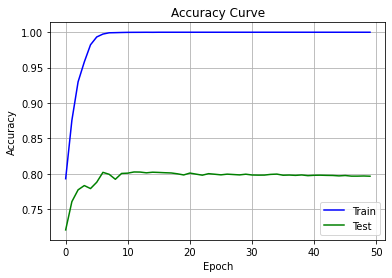

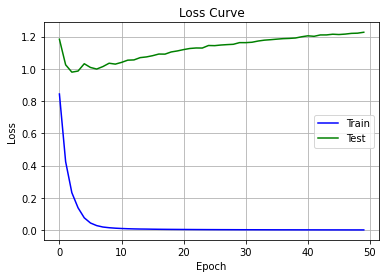

In [ ]:
def getcurves(his):
    
    tracc=his['accuracy']
    trl=his['loss']
    teacc = his['val_accuracy']
    tel = his['val_loss']
    
    plt.plot(tracc,color='blue')
    plt.plot(teacc,color='green')
    plt.title('Accuracy Curve')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.grid()
    plt.show()
    
    plt.plot(trl,color='blue')
    plt.plot(tel,color='green')
    plt.title('Loss Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.grid()
    plt.show()

getcurves(opth)